In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
import numpy as np
import matplotlib.pyplot as plt
import spacy
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
!python -m spacy download el_core_news_sm

In [3]:
nlp = spacy.load('el_core_news_sm')

In [4]:
cv = CountVectorizer(stop_words= list(nlp.Defaults.stop_words), min_df=0.01, max_df=0.95)

In [5]:
filepath = "https://raw.githubusercontent.com/datajour-gr/DataJournalism/main/Bachelor%20Lessons%202023/Lesson%2010/NRC_GREEK_Translated_6_2020.csv"

In [21]:
emolex = pd.read_csv(filepath)

In [22]:
emolex = emolex_df.drop_duplicates(subset=['word'])
emolex = emolex_df.dropna()
emolex.reset_index(inplace = True, drop=True)

In [9]:
tovima = pd.read_csv('/content/temp/tovima_full_articles.csv')

In [12]:
tovima['datetime'] = pd.to_datetime(tovima['datetime'], format='%d-%m-%Y %H:%M')

In [27]:
tovimas = tovima[['datetime','full_text' ]]

In [30]:
vec = CountVectorizer(analyzer = 'word', vocabulary = emolex.word,
                      lowercase=False,
                      strip_accents = 'unicode',
                      stop_words= list(nlp.Defaults.stop_words),
                      ngram_range=(1, 2))

In [31]:
matrix = vec.fit_transform(tovimas['full_text'])
vocab = vec.get_feature_names_out()
wordcount = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount.head()

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['αδιακοπα', 'ακομα', 'ακομη', 'ακριβως', 'αλλα', 'αλλαχου', 'αλλες', 'αλλη', 'αλλην', 'αλλης', 'αλλιως', 'αλλιωτικα', 'αλλο', 'αλλοι', 'αλλοιως', 'αλλοιωτικα', 'αλλον', 'αλλος', 'αλλοτε', 'αλλου', 'αλλους', 'αλλων', 'αμα', 'αμεσα', 'αμεσως', 'ανα', 'αναμεσα', 'αναμεταξυ', 'ανευ', 'αντι', 'αντιπερα', 'αντις', 'ανω', 'ανωτερω', 'αξαφνα', 'απεναντι', 'απο', 'αποψε', 'αρα', 'αραγε', 'αρκετα', 'αρκετες', 'αρχικα', 'αυριο', 'αυτα', 'αυτες', 'αυτη', 'αυτην', 'αυτης', 'αυτο', 'αυτοι', 'αυτον', 'αυτος', 'αυτου', 'αυτους', 'αυτων', 'αφοτου', 'αφου', 'βεβαια', 'βεβαιοτατα', 'γιατι', 'γρηγορα', 'γυρω', 'δεινα', 'δεξια', 'δηθεν', 'δηλαδη', 'διαρκως', 'δικα', 'δικο', 'δικοι', 'δικος', 'δικου', 'δικους', 'διολου', 'διπλα', 'διχως', 'εαν', 'εαυτο', 'εαυτον', 'εαυτου', 'εαυτους', 'εαυτων', 'εγιναν', 'εγινε',

,αφεση,ενορκη βεβαιωση,εχοντας,εχω,οριο,ορμος,υδρα,αγια τραπεζα,αμην,απατσι,...,κλητηριο ενταλμα,κατειργασμενος,μαγια,κιτρινο,κιτρινιζω,ουρλιασμα,κροκος αυγου,νεοτερος,ζεφυρος,ζουμ
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
positive_words = emolex[emolex.Positive == 1]['word']

negative_words = emolex[emolex.Negative == 1]['word']

angry_words = emolex[emolex.Anger == 1]['word']

anticipation_words = emolex[emolex.Anticipation == 1]['word']

disgust_words = emolex[emolex.Disgust == 1]['word']

fear_words = emolex[emolex.Fear == 1]['word']

joy_words = emolex[emolex.Joy == 1]['word']

sadness_words = emolex[emolex.Sadness == 1]['word']

surprise_words = emolex[emolex.Surprise == 1]['word']

trust_words = emolex[emolex.Trust == 1]['word']

In [34]:
tovimas['anger'] = wordcount[angry_words].sum(axis=1)

tovimas['positive'] = wordcount[positive_words].sum(axis=1)

tovimas['joy'] = wordcount[joy_words].sum(axis=1)

tovimas['disgust'] = wordcount[disgust_words].sum(axis=1)

tovimas['surprise'] = wordcount[surprise_words].sum(axis=1)

tovimas['trust'] = wordcount[trust_words].sum(axis=1)

tovimas['anticipation'] = wordcount[anticipation_words].sum(axis=1)

tovimas['sadness'] = wordcount[sadness_words].sum(axis=1)

tovimas['negative'] = wordcount[negative_words].sum(axis=1)

tovimas['fear'] = wordcount[fear_words].sum(axis=1)

<ipython-input-34-63e209682126>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tovimas['anger'] = wordcount[angry_words].sum(axis=1)
<ipython-input-34-63e209682126>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tovimas['positive'] = wordcount[positive_words].sum(axis=1)
<ipython-input-34-63e209682126>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

In [36]:
tovimas.reset_index(inplace=True)
tovimas.set_index('datetime', inplace=True)

<Axes: xlabel='datetime'>

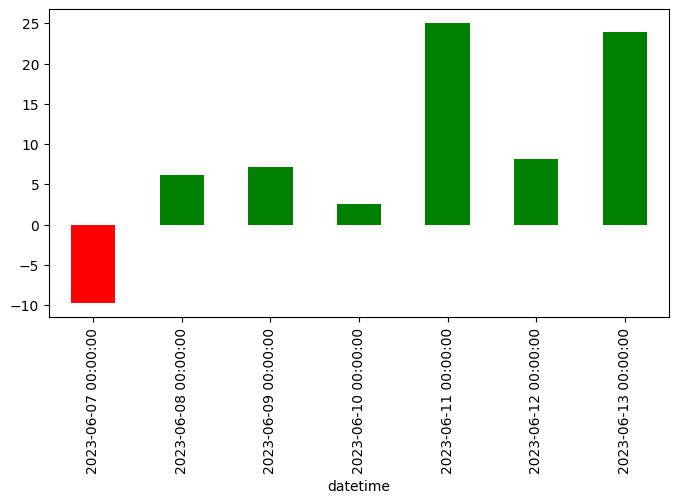

In [38]:
tovimas['(-)αρνητικότητα | θετικότητα(+)'] = tovimas.positive*100//tovimas[['positive','negative']].sum(
        axis=1) - tovimas.negative*100//tovimas[['positive','negative']].sum(axis=1)

tovimas['(-)αρνητικότητα | θετικότητα(+)'].resample('D').mean().plot(kind='bar',
                                                                               color=(tovimas['(-)αρνητικότητα | θετικότητα(+)'].resample('D').mean()>0
                                                                               ).map({True: 'g', False: 'r'}), figsize=(8,4))

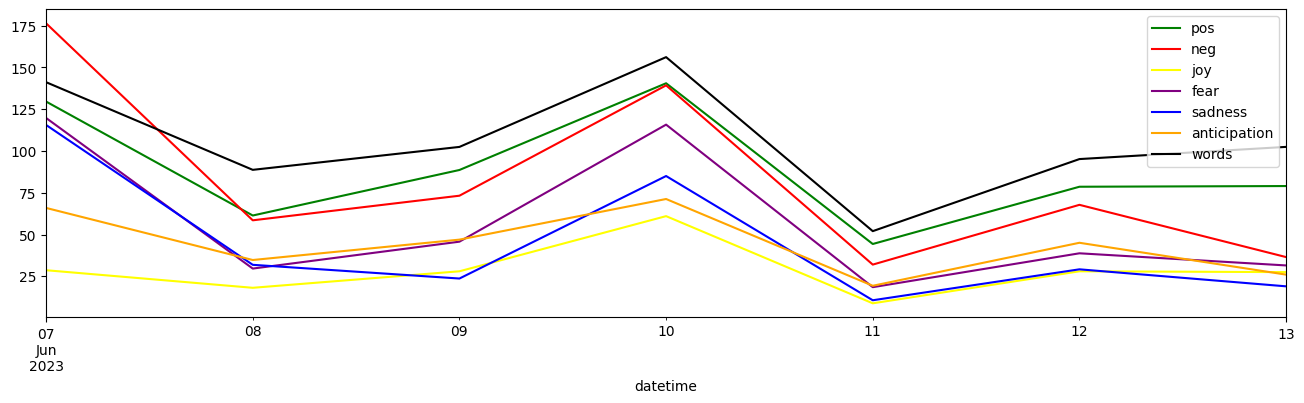

In [55]:
ax = tovimas['positive'].resample('D').mean().plot(figsize=(16,4),
                                                          color = 'g', label='pos')
tovimas['negative'].resample('D').mean().plot(figsize=(16,4), ax = ax,
                                                   label = 'neg', color = 'r')
tovimas['joy'].resample('D').mean().plot(figsize=(16,4), ax = ax,
                                                label = 'joy',color = 'yellow').legend()
tovimas['fear'].resample('D').mean().plot(figsize=(16,4), ax = ax,
                                                label = 'fear',color = 'purple').legend()
tovimas['sadness'].resample('D').mean().plot(figsize=(16,4), ax = ax,
                                                label = 'sadness',color = 'blue').legend()
tovimas['anticipation'].resample('D').mean().plot(figsize=(16,4), ax = ax,
                                                label = 'anticipation',color = 'orange').legend()
(tovimas['full_text'].str.len().resample('D').mean()/200).plot(figsize=(16,4), ax = ax,
                                                label = 'words',color = 'black').legend()

In [57]:
tovimas[(tovimas['(-)αρνητικότητα | θετικότητα(+)'] == tovimas['(-)αρνητικότητα | θετικότητα(+)'].max()) |
                  (tovimas['(-)αρνητικότητα | θετικότητα(+)'] == tovimas['(-)αρνητικότητα | θετικότητα(+)'].min())
                  ][['index', 'positive', 'negative', '(-)αρνητικότητα | θετικότητα(+)']]

,index,positive,negative,(-)αρνητικότητα | θετικότητα(+)
datetime,,,,
2023-06-12 23:51:00,2,40,9,63
2023-06-09 17:08:00,41,157,36,63
2023-06-07 12:49:00,79,5,23,-65


In [60]:
tovima.loc[[79, 2, 41]]

,site,url,section,title,datetime,author,full_text
79,tovima.gr,https://www.tovima.gr/2023/06/07/world/kina-en...,Κόσμος,Κίνα: «Έντονη ανησυχία» για τις ζημιές στο φρ...,2023-06-07 12:49:00,Newsroom,Η Κίνα εξέφρασε σήμερα «έντονη ανησυχία» μετά ...
2,tovima.gr,https://www.tovima.gr/2023/06/12/world/kanadas...,Κόσμος,Καναδάς: Μαίνονται οι φωτιές στην Αλμπέρτα,2023-06-12 23:51:00,Newsroom,Οι καπνοί από τις δασικές πυρκαγιές έχουν καλύ...
41,tovima.gr,https://www.tovima.gr/2023/06/09/world/cnn-pro...,Κόσμος,CNN: Πρόταση για την εξαγορά του από τον Τζον...,2023-06-09 17:08:00,Newsroom,Δύο 24ωρα μετά την αποχώρηση του Chris Licht α...
